#  Importing packages

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

### Importing Dataset 

In [2]:
AAPL = pd.read_csv("Pre_Processed_AAPL.csv")

### Creating and normalizing dataset

In [3]:
def Dataset(Data, Date):
  Train_Data = Data['Close'][Data['Date'] < Date].to_numpy()
  Data_Train = []
  Data_Train_X = []
  Data_Train_Y = []
  for i in range(0, len(Train_Data), 5):
    try:
      Data_Train.append(Train_Data[i : i + 5])
    except:
      pass

  if len(Data_Train[-1]) < 5:
    Data_Train.pop(-1)
  
  Data_Train_X = Data_Train[0 : -1]
  Data_Train_X = np.array(Data_Train_X)
  Data_Train_X = Data_Train_X.reshape((-1, 5, 1))
  Data_Train_Y = Data_Train[1 : len(Data_Train)]
  Data_Train_Y = np.array(Data_Train_Y)
  Data_Train_Y = Data_Train_Y.reshape((-1, 5, 1))


  Test_Data = Data['Close'][Data['Date'] >= Date].to_numpy()
  Data_Test = []
  Data_Test_X = []
  Data_Test_Y = []
  for i in range(0, len(Test_Data), 5):
    try:
      Data_Test.append(Test_Data[i : i + 5])
    except:
      pass

  if len(Data_Test[-1]) < 5:
    Data_Test.pop(-1)
  
  Data_Test_X = Data_Test[0 : -1]
  Data_Test_X = np.array(Data_Test_X)
  Data_Test_X = Data_Test_X.reshape((-1, 5, 1))
  Data_Test_Y = Data_Test[1 : len(Data_Test)]
  Data_Test_Y = np.array(Data_Test_Y)
  Data_Test_Y = Data_Test_Y.reshape((-1, 5, 1))

  return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y

### Creating model 

In [4]:
def Model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model

In [5]:
model = Model() # Creating object of the model

In [6]:
model.summary() # Defining the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 200)            161600    
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense (Dense)                (None, 200)               40200     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 255       
Total params: 548,005
Trainable params: 548,005
Non-trainable params: 0
__________________________________________________

### Custom Learning Rate

In [7]:
def scheduler(epoch):
  
  if epoch <= 150:
    lrate = (10 ** -5) * (epoch / 150) 
  elif epoch <= 400:
    initial_lrate = (10 ** -5)
    k = 0.01
    lrate = initial_lrate * math.exp(-k * (epoch - 150))
  else:
    lrate = (10 ** -6)
  
  return lrate

### Plotting the learning rate  

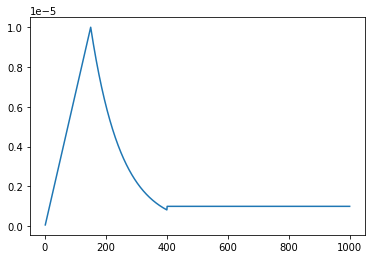

In [8]:
epochs = [i for i in range(1, 1001, 1)]
lrate = [scheduler(i) for i in range(1, 1001, 1)]
plt.plot(epochs, lrate)

In [9]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler) # Defining learning rate scheduler

In [10]:
AAPL.head() # Checking the data

,Date,Open,High,Low,Close,Adj. Close,Volume
0,2015-01-02,27.85,27.86,26.84,27.33,24.86,212818400.0
1,2015-01-05,27.07,27.16,26.35,26.56,24.16,257142000.0
2,2015-01-06,26.64,26.86,26.16,26.57,24.16,263188400.0
3,2015-01-07,26.80,27.05,26.67,26.94,24.50,160423600.0
4,2015-01-08,27.31,28.04,27.17,27.97,25.44,237458000.0


In [11]:
AAPL.info() # Defining the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1549 non-null   object 
 1   Open        1549 non-null   float64
 2   High        1549 non-null   float64
 3   Low         1549 non-null   float64
 4   Close       1549 non-null   float64
 5   Adj. Close  1549 non-null   float64
 6   Volume      1549 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.8+ KB


### Splitting data

In [12]:
# Change Dtype of Date column
AAPL["Date"] = pd.to_datetime(AAPL["Date"])

In [13]:
#Spliting  the Data into Training and Test set Training Period: 2015-01-02 - 2020-09-30

In [14]:
AAPL_Date = '2020-10-01'
AAPL_Train_X, AAPL_Train_Y, AAPL_Test_X, AAPL_Test_Y = Dataset(AAPL, AAPL_Date)

In [15]:
AAPL_Test_X

array([[[116.79],
        [113.02],
        [116.5 ],
        [113.16],
        [115.08]],

       [[114.97],
        [116.97],
        [124.4 ],
        [121.1 ],
        [121.19]],

       [[120.71],
        [119.02],
        [115.98],
        [117.51],
        [116.87]],

       [[115.75],
        [115.04],
        [115.05],
        [116.6 ],
        [111.2 ]],

       [[115.32],
        [108.86],
        [108.77],
        [110.44],
        [114.95]],

       [[119.03],
        [118.69],
        [116.32],
        [115.97],
        [119.49]],

       [[119.21],
        [119.26],
        [120.3 ],
        [119.39],
        [118.03]],

       [[118.64],
        [117.34],
        [113.85],
        [115.17],
        [116.03]],

       [[116.59],
        [119.05],
        [122.72],
        [123.08],
        [122.94]],

       [[122.25],
        [123.75],
        [124.38],
        [121.78],
        [123.24]],

       [[122.41],
        [121.78],
        [127.88],
        [127.81],
        

### Fitting the model

In [16]:
AAPL_Model = Model()

In [17]:
AAPL_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError()) # Compiling the model

In [18]:
AAPL_hist = AAPL_Model.fit(AAPL_Train_X, AAPL_Train_Y, epochs = 1000, validation_data = (AAPL_Test_X, AAPL_Test_Y), callbacks=[callback])

Epoch 1/1000
9/9 [==============================] - 3s 156ms/step - loss: 2569.5979 - root_mean_squared_error: 50.6501 - val_loss: 15755.9375 - val_root_mean_squared_error: 125.5227
Epoch 2/1000
9/9 [==============================] - 0s 15ms/step - loss: 2360.2140 - root_mean_squared_error: 48.5773 - val_loss: 15755.6943 - val_root_mean_squared_error: 125.5217
Epoch 3/1000
9/9 [==============================] - 0s 13ms/step - loss: 2535.9350 - root_mean_squared_error: 50.3463 - val_loss: 15755.1748 - val_root_mean_squared_error: 125.5196
Epoch 4/1000
9/9 [==============================] - 0s 13ms/step - loss: 2392.5232 - root_mean_squared_error: 48.8882 - val_loss: 15754.4248 - val_root_mean_squared_error: 125.5166
Epoch 5/1000
9/9 [==============================] - 0s 14ms/step - loss: 2486.1321 - root_mean_squared_error: 49.8462 - val_loss: 15753.4043 - val_root_mean_squared_error: 125.5126
Epoch 6/1000
9/9 [==============================] - 0s 14ms/step - loss: 2288.8321 - root_mean

9/9 [==============================] - 0s 12ms/step - loss: 2251.4726 - root_mean_squared_error: 47.4450 - val_loss: 14828.1748 - val_root_mean_squared_error: 121.7710
Epoch 47/1000
9/9 [==============================] - 0s 12ms/step - loss: 2235.1755 - root_mean_squared_error: 47.2679 - val_loss: 14777.6689 - val_root_mean_squared_error: 121.5634
Epoch 48/1000
9/9 [==============================] - 0s 12ms/step - loss: 2272.6238 - root_mean_squared_error: 47.6627 - val_loss: 14725.8516 - val_root_mean_squared_error: 121.3501
Epoch 49/1000
9/9 [==============================] - 0s 17ms/step - loss: 2094.8099 - root_mean_squared_error: 45.7054 - val_loss: 14673.6641 - val_root_mean_squared_error: 121.1349
Epoch 50/1000
9/9 [==============================] - 0s 13ms/step - loss: 2317.3766 - root_mean_squared_error: 48.1356 - val_loss: 14616.1826 - val_root_mean_squared_error: 120.8974
Epoch 51/1000
9/9 [==============================] - 0s 13ms/step - loss: 2299.8919 - root_mean_squared_

9/9 [==============================] - 0s 13ms/step - loss: 299.8248 - root_mean_squared_error: 17.3136 - val_loss: 957.4569 - val_root_mean_squared_error: 30.9428
Epoch 92/1000
9/9 [==============================] - 0s 13ms/step - loss: 246.7468 - root_mean_squared_error: 15.6960 - val_loss: 734.0359 - val_root_mean_squared_error: 27.0931
Epoch 93/1000
9/9 [==============================] - 0s 14ms/step - loss: 185.2749 - root_mean_squared_error: 13.6066 - val_loss: 595.1796 - val_root_mean_squared_error: 24.3963
Epoch 94/1000
9/9 [==============================] - 0s 12ms/step - loss: 140.9393 - root_mean_squared_error: 11.8707 - val_loss: 504.3429 - val_root_mean_squared_error: 22.4576
Epoch 95/1000
9/9 [==============================] - 0s 12ms/step - loss: 119.1978 - root_mean_squared_error: 10.9174 - val_loss: 425.1013 - val_root_mean_squared_error: 20.6180
Epoch 96/1000
9/9 [==============================] - 0s 13ms/step - loss: 109.4856 - root_mean_squared_error: 10.4529 - val_

Epoch 138/1000
9/9 [==============================] - 0s 15ms/step - loss: 10.1570 - root_mean_squared_error: 3.1858 - val_loss: 31.1307 - val_root_mean_squared_error: 5.5795
Epoch 139/1000
9/9 [==============================] - 0s 13ms/step - loss: 9.2606 - root_mean_squared_error: 3.0410 - val_loss: 31.0001 - val_root_mean_squared_error: 5.5678
Epoch 140/1000
9/9 [==============================] - 0s 13ms/step - loss: 10.1210 - root_mean_squared_error: 3.1768 - val_loss: 31.6970 - val_root_mean_squared_error: 5.6300
Epoch 141/1000
9/9 [==============================] - 0s 13ms/step - loss: 9.8148 - root_mean_squared_error: 3.1311 - val_loss: 32.1577 - val_root_mean_squared_error: 5.6708
Epoch 142/1000
9/9 [==============================] - 0s 13ms/step - loss: 10.6917 - root_mean_squared_error: 3.2589 - val_loss: 30.7295 - val_root_mean_squared_error: 5.5434
Epoch 143/1000
9/9 [==============================] - 0s 14ms/step - loss: 9.0215 - root_mean_squared_error: 2.9978 - val_loss:

9/9 [==============================] - 0s 12ms/step - loss: 7.7510 - root_mean_squared_error: 2.7755 - val_loss: 27.0195 - val_root_mean_squared_error: 5.1980
Epoch 186/1000
9/9 [==============================] - 0s 14ms/step - loss: 6.2913 - root_mean_squared_error: 2.4982 - val_loss: 26.8405 - val_root_mean_squared_error: 5.1808
Epoch 187/1000
9/9 [==============================] - 0s 14ms/step - loss: 6.3470 - root_mean_squared_error: 2.4860 - val_loss: 26.8917 - val_root_mean_squared_error: 5.1857
Epoch 188/1000
9/9 [==============================] - 0s 14ms/step - loss: 7.6095 - root_mean_squared_error: 2.7465 - val_loss: 26.8774 - val_root_mean_squared_error: 5.1843
Epoch 189/1000
9/9 [==============================] - 0s 16ms/step - loss: 7.3748 - root_mean_squared_error: 2.7025 - val_loss: 26.7482 - val_root_mean_squared_error: 5.1719
Epoch 190/1000
9/9 [==============================] - 0s 15ms/step - loss: 7.9631 - root_mean_squared_error: 2.8143 - val_loss: 26.6862 - val_roo

9/9 [==============================] - 0s 13ms/step - loss: 5.6752 - root_mean_squared_error: 2.3771 - val_loss: 26.1445 - val_root_mean_squared_error: 5.1132
Epoch 233/1000
9/9 [==============================] - 0s 14ms/step - loss: 7.6699 - root_mean_squared_error: 2.7509 - val_loss: 26.1068 - val_root_mean_squared_error: 5.1095
Epoch 234/1000
9/9 [==============================] - 0s 14ms/step - loss: 7.4970 - root_mean_squared_error: 2.7250 - val_loss: 26.0534 - val_root_mean_squared_error: 5.1043
Epoch 235/1000
9/9 [==============================] - 0s 14ms/step - loss: 5.6359 - root_mean_squared_error: 2.3586 - val_loss: 26.0847 - val_root_mean_squared_error: 5.1073
Epoch 236/1000
9/9 [==============================] - 0s 14ms/step - loss: 5.0148 - root_mean_squared_error: 2.2150 - val_loss: 26.0436 - val_root_mean_squared_error: 5.1033
Epoch 237/1000
9/9 [==============================] - 0s 15ms/step - loss: 7.8361 - root_mean_squared_error: 2.7803 - val_loss: 26.0505 - val_roo

9/9 [==============================] - 0s 19ms/step - loss: 6.2935 - root_mean_squared_error: 2.4797 - val_loss: 25.7362 - val_root_mean_squared_error: 5.0731
Epoch 280/1000
9/9 [==============================] - 0s 15ms/step - loss: 7.3980 - root_mean_squared_error: 2.7124 - val_loss: 25.6820 - val_root_mean_squared_error: 5.0677
Epoch 281/1000
9/9 [==============================] - 0s 16ms/step - loss: 4.8879 - root_mean_squared_error: 2.1860 - val_loss: 25.6591 - val_root_mean_squared_error: 5.0655
Epoch 282/1000
9/9 [==============================] - 0s 17ms/step - loss: 6.3070 - root_mean_squared_error: 2.5036 - val_loss: 25.6846 - val_root_mean_squared_error: 5.0680
Epoch 283/1000
9/9 [==============================] - 0s 19ms/step - loss: 4.9805 - root_mean_squared_error: 2.1835 - val_loss: 25.6829 - val_root_mean_squared_error: 5.0678
Epoch 284/1000
9/9 [==============================] - 0s 16ms/step - loss: 6.6732 - root_mean_squared_error: 2.5710 - val_loss: 25.7596 - val_roo

9/9 [==============================] - 0s 14ms/step - loss: 6.1061 - root_mean_squared_error: 2.4661 - val_loss: 25.3933 - val_root_mean_squared_error: 5.0392
Epoch 327/1000
9/9 [==============================] - 0s 17ms/step - loss: 5.7267 - root_mean_squared_error: 2.3890 - val_loss: 25.3373 - val_root_mean_squared_error: 5.0336
Epoch 328/1000
9/9 [==============================] - 0s 17ms/step - loss: 6.2374 - root_mean_squared_error: 2.4864 - val_loss: 25.3928 - val_root_mean_squared_error: 5.0391
Epoch 329/1000
9/9 [==============================] - 0s 16ms/step - loss: 7.2863 - root_mean_squared_error: 2.6902 - val_loss: 25.3151 - val_root_mean_squared_error: 5.0314
Epoch 330/1000
9/9 [==============================] - 0s 16ms/step - loss: 5.1366 - root_mean_squared_error: 2.2487 - val_loss: 25.3028 - val_root_mean_squared_error: 5.0302
Epoch 331/1000
9/9 [==============================] - 0s 15ms/step - loss: 6.6640 - root_mean_squared_error: 2.5623 - val_loss: 25.2410 - val_roo

9/9 [==============================] - 0s 16ms/step - loss: 7.3549 - root_mean_squared_error: 2.6917 - val_loss: 24.8388 - val_root_mean_squared_error: 4.9838
Epoch 374/1000
9/9 [==============================] - 0s 14ms/step - loss: 6.8523 - root_mean_squared_error: 2.6108 - val_loss: 24.8101 - val_root_mean_squared_error: 4.9810
Epoch 375/1000
9/9 [==============================] - 0s 14ms/step - loss: 6.6733 - root_mean_squared_error: 2.5749 - val_loss: 24.8449 - val_root_mean_squared_error: 4.9845
Epoch 376/1000
9/9 [==============================] - 0s 14ms/step - loss: 5.7415 - root_mean_squared_error: 2.3834 - val_loss: 24.8253 - val_root_mean_squared_error: 4.9825
Epoch 377/1000
9/9 [==============================] - 0s 15ms/step - loss: 5.2521 - root_mean_squared_error: 2.2785 - val_loss: 24.8378 - val_root_mean_squared_error: 4.9837
Epoch 378/1000
9/9 [==============================] - 0s 15ms/step - loss: 5.0323 - root_mean_squared_error: 2.2096 - val_loss: 24.7811 - val_roo

9/9 [==============================] - 0s 18ms/step - loss: 5.5489 - root_mean_squared_error: 2.3504 - val_loss: 24.1004 - val_root_mean_squared_error: 4.9092
Epoch 421/1000
9/9 [==============================] - 0s 18ms/step - loss: 5.2113 - root_mean_squared_error: 2.2713 - val_loss: 24.0954 - val_root_mean_squared_error: 4.9087
Epoch 422/1000
9/9 [==============================] - 0s 18ms/step - loss: 6.5103 - root_mean_squared_error: 2.5405 - val_loss: 24.1000 - val_root_mean_squared_error: 4.9092
Epoch 423/1000
9/9 [==============================] - 0s 17ms/step - loss: 6.2202 - root_mean_squared_error: 2.4748 - val_loss: 24.1045 - val_root_mean_squared_error: 4.9096
Epoch 424/1000
9/9 [==============================] - 0s 17ms/step - loss: 5.1464 - root_mean_squared_error: 2.2513 - val_loss: 24.0603 - val_root_mean_squared_error: 4.9051
Epoch 425/1000
9/9 [==============================] - 0s 18ms/step - loss: 4.9939 - root_mean_squared_error: 2.2260 - val_loss: 24.0685 - val_roo

9/9 [==============================] - 0s 15ms/step - loss: 5.0635 - root_mean_squared_error: 2.2441 - val_loss: 23.6861 - val_root_mean_squared_error: 4.8668
Epoch 468/1000
9/9 [==============================] - 0s 16ms/step - loss: 6.5778 - root_mean_squared_error: 2.5576 - val_loss: 23.6803 - val_root_mean_squared_error: 4.8662
Epoch 469/1000
9/9 [==============================] - 0s 15ms/step - loss: 5.1562 - root_mean_squared_error: 2.2588 - val_loss: 23.6643 - val_root_mean_squared_error: 4.8646
Epoch 470/1000
9/9 [==============================] - 0s 15ms/step - loss: 4.8584 - root_mean_squared_error: 2.1792 - val_loss: 23.6744 - val_root_mean_squared_error: 4.8656
Epoch 471/1000
9/9 [==============================] - 0s 14ms/step - loss: 6.3426 - root_mean_squared_error: 2.5142 - val_loss: 23.6562 - val_root_mean_squared_error: 4.8638
Epoch 472/1000
9/9 [==============================] - 0s 14ms/step - loss: 5.7910 - root_mean_squared_error: 2.3909 - val_loss: 23.6760 - val_roo

9/9 [==============================] - 0s 21ms/step - loss: 4.3762 - root_mean_squared_error: 2.0730 - val_loss: 23.3710 - val_root_mean_squared_error: 4.8344
Epoch 515/1000
9/9 [==============================] - 0s 16ms/step - loss: 5.2234 - root_mean_squared_error: 2.2798 - val_loss: 23.3911 - val_root_mean_squared_error: 4.8364
Epoch 516/1000
9/9 [==============================] - 0s 42ms/step - loss: 5.7415 - root_mean_squared_error: 2.3918 - val_loss: 23.3486 - val_root_mean_squared_error: 4.8320
Epoch 517/1000
9/9 [==============================] - 0s 28ms/step - loss: 5.3104 - root_mean_squared_error: 2.2855 - val_loss: 23.3212 - val_root_mean_squared_error: 4.8292
Epoch 518/1000
9/9 [==============================] - 0s 29ms/step - loss: 4.4376 - root_mean_squared_error: 2.0959 - val_loss: 23.3305 - val_root_mean_squared_error: 4.8302
Epoch 519/1000
9/9 [==============================] - 0s 22ms/step - loss: 5.7107 - root_mean_squared_error: 2.3855 - val_loss: 23.3214 - val_roo

9/9 [==============================] - 0s 16ms/step - loss: 5.1376 - root_mean_squared_error: 2.2476 - val_loss: 23.0656 - val_root_mean_squared_error: 4.8027
Epoch 562/1000
9/9 [==============================] - 0s 16ms/step - loss: 5.5580 - root_mean_squared_error: 2.3550 - val_loss: 23.0579 - val_root_mean_squared_error: 4.8019
Epoch 563/1000
9/9 [==============================] - 0s 15ms/step - loss: 6.0539 - root_mean_squared_error: 2.4403 - val_loss: 23.0555 - val_root_mean_squared_error: 4.8016
Epoch 564/1000
9/9 [==============================] - 0s 16ms/step - loss: 4.6930 - root_mean_squared_error: 2.1590 - val_loss: 23.0349 - val_root_mean_squared_error: 4.7995
Epoch 565/1000
9/9 [==============================] - 0s 18ms/step - loss: 8.5646 - root_mean_squared_error: 2.8603 - val_loss: 23.0287 - val_root_mean_squared_error: 4.7988
Epoch 566/1000
9/9 [==============================] - 0s 16ms/step - loss: 4.3760 - root_mean_squared_error: 2.0676 - val_loss: 23.0448 - val_roo

9/9 [==============================] - 0s 20ms/step - loss: 6.1293 - root_mean_squared_error: 2.4688 - val_loss: 22.7612 - val_root_mean_squared_error: 4.7709
Epoch 609/1000
9/9 [==============================] - 0s 17ms/step - loss: 5.7384 - root_mean_squared_error: 2.3932 - val_loss: 22.7540 - val_root_mean_squared_error: 4.7701
Epoch 610/1000
9/9 [==============================] - 0s 15ms/step - loss: 4.8351 - root_mean_squared_error: 2.1849 - val_loss: 22.7675 - val_root_mean_squared_error: 4.7715
Epoch 611/1000
9/9 [==============================] - 0s 17ms/step - loss: 6.6797 - root_mean_squared_error: 2.5691 - val_loss: 22.7394 - val_root_mean_squared_error: 4.7686
Epoch 612/1000
9/9 [==============================] - 0s 19ms/step - loss: 4.8530 - root_mean_squared_error: 2.1978 - val_loss: 22.7525 - val_root_mean_squared_error: 4.7700
Epoch 613/1000
9/9 [==============================] - 0s 18ms/step - loss: 4.9413 - root_mean_squared_error: 2.2126 - val_loss: 22.7287 - val_roo

9/9 [==============================] - 0s 15ms/step - loss: 4.1232 - root_mean_squared_error: 2.0187 - val_loss: 22.4337 - val_root_mean_squared_error: 4.7364
Epoch 656/1000
9/9 [==============================] - 0s 15ms/step - loss: 6.4884 - root_mean_squared_error: 2.5362 - val_loss: 22.4280 - val_root_mean_squared_error: 4.7358
Epoch 657/1000
9/9 [==============================] - 0s 17ms/step - loss: 6.0086 - root_mean_squared_error: 2.4441 - val_loss: 22.4181 - val_root_mean_squared_error: 4.7348
Epoch 658/1000
9/9 [==============================] - 0s 18ms/step - loss: 5.8868 - root_mean_squared_error: 2.4170 - val_loss: 22.4231 - val_root_mean_squared_error: 4.7353
Epoch 659/1000
9/9 [==============================] - 0s 16ms/step - loss: 4.3392 - root_mean_squared_error: 2.0677 - val_loss: 22.4064 - val_root_mean_squared_error: 4.7335
Epoch 660/1000
9/9 [==============================] - 0s 18ms/step - loss: 5.2227 - root_mean_squared_error: 2.2838 - val_loss: 22.4048 - val_roo

9/9 [==============================] - 0s 16ms/step - loss: 5.8721 - root_mean_squared_error: 2.4194 - val_loss: 22.1118 - val_root_mean_squared_error: 4.7023
Epoch 702/1000
9/9 [==============================] - 0s 15ms/step - loss: 4.7030 - root_mean_squared_error: 2.1468 - val_loss: 22.1426 - val_root_mean_squared_error: 4.7056
Epoch 703/1000
9/9 [==============================] - 0s 15ms/step - loss: 4.8808 - root_mean_squared_error: 2.2022 - val_loss: 22.1209 - val_root_mean_squared_error: 4.7033
Epoch 704/1000
9/9 [==============================] - 0s 13ms/step - loss: 5.7048 - root_mean_squared_error: 2.3817 - val_loss: 22.0927 - val_root_mean_squared_error: 4.7003
Epoch 705/1000
9/9 [==============================] - 0s 15ms/step - loss: 4.7912 - root_mean_squared_error: 2.1762 - val_loss: 22.0710 - val_root_mean_squared_error: 4.6980
Epoch 706/1000
9/9 [==============================] - 0s 15ms/step - loss: 6.3826 - root_mean_squared_error: 2.5073 - val_loss: 22.0467 - val_roo

9/9 [==============================] - 0s 14ms/step - loss: 5.0574 - root_mean_squared_error: 2.2382 - val_loss: 21.7896 - val_root_mean_squared_error: 4.6679
Epoch 749/1000
9/9 [==============================] - 0s 15ms/step - loss: 4.5947 - root_mean_squared_error: 2.1412 - val_loss: 21.8037 - val_root_mean_squared_error: 4.6694
Epoch 750/1000
9/9 [==============================] - 0s 16ms/step - loss: 4.4246 - root_mean_squared_error: 2.0920 - val_loss: 21.7595 - val_root_mean_squared_error: 4.6647
Epoch 751/1000
9/9 [==============================] - 0s 21ms/step - loss: 5.6258 - root_mean_squared_error: 2.3606 - val_loss: 21.7811 - val_root_mean_squared_error: 4.6670
Epoch 752/1000
9/9 [==============================] - 0s 15ms/step - loss: 5.4588 - root_mean_squared_error: 2.3224 - val_loss: 21.7542 - val_root_mean_squared_error: 4.6641
Epoch 753/1000
9/9 [==============================] - 0s 16ms/step - loss: 5.8014 - root_mean_squared_error: 2.3999 - val_loss: 21.7646 - val_roo

9/9 [==============================] - 0s 15ms/step - loss: 6.0448 - root_mean_squared_error: 2.4459 - val_loss: 21.4972 - val_root_mean_squared_error: 4.6365
Epoch 796/1000
9/9 [==============================] - 0s 15ms/step - loss: 5.1934 - root_mean_squared_error: 2.2717 - val_loss: 21.5177 - val_root_mean_squared_error: 4.6387
Epoch 797/1000
9/9 [==============================] - 0s 15ms/step - loss: 5.8647 - root_mean_squared_error: 2.4162 - val_loss: 21.6011 - val_root_mean_squared_error: 4.6477
Epoch 798/1000
9/9 [==============================] - 0s 14ms/step - loss: 5.5001 - root_mean_squared_error: 2.3379 - val_loss: 21.5012 - val_root_mean_squared_error: 4.6369
Epoch 799/1000
9/9 [==============================] - 0s 15ms/step - loss: 6.0447 - root_mean_squared_error: 2.4335 - val_loss: 21.6218 - val_root_mean_squared_error: 4.6499
Epoch 800/1000
9/9 [==============================] - 0s 16ms/step - loss: 6.7230 - root_mean_squared_error: 2.5789 - val_loss: 21.5178 - val_roo

9/9 [==============================] - 0s 14ms/step - loss: 4.2918 - root_mean_squared_error: 2.0509 - val_loss: 21.4291 - val_root_mean_squared_error: 4.6292
Epoch 843/1000
9/9 [==============================] - 0s 15ms/step - loss: 5.4704 - root_mean_squared_error: 2.3278 - val_loss: 21.5210 - val_root_mean_squared_error: 4.6391
Epoch 844/1000
9/9 [==============================] - 0s 15ms/step - loss: 5.2820 - root_mean_squared_error: 2.2947 - val_loss: 21.3830 - val_root_mean_squared_error: 4.6242
Epoch 845/1000
9/9 [==============================] - 0s 17ms/step - loss: 4.2002 - root_mean_squared_error: 2.0313 - val_loss: 21.4287 - val_root_mean_squared_error: 4.6291
Epoch 846/1000
9/9 [==============================] - 0s 16ms/step - loss: 5.9153 - root_mean_squared_error: 2.4259 - val_loss: 21.4064 - val_root_mean_squared_error: 4.6267
Epoch 847/1000
9/9 [==============================] - 0s 16ms/step - loss: 5.6019 - root_mean_squared_error: 2.3576 - val_loss: 21.3322 - val_roo

9/9 [==============================] - 0s 17ms/step - loss: 4.5110 - root_mean_squared_error: 2.1113 - val_loss: 21.4185 - val_root_mean_squared_error: 4.6280
Epoch 890/1000
9/9 [==============================] - 0s 16ms/step - loss: 5.4881 - root_mean_squared_error: 2.3312 - val_loss: 21.4403 - val_root_mean_squared_error: 4.6304
Epoch 891/1000
9/9 [==============================] - 0s 16ms/step - loss: 5.1938 - root_mean_squared_error: 2.2749 - val_loss: 21.2792 - val_root_mean_squared_error: 4.6129
Epoch 892/1000
9/9 [==============================] - 0s 16ms/step - loss: 4.7716 - root_mean_squared_error: 2.1739 - val_loss: 21.3349 - val_root_mean_squared_error: 4.6190
Epoch 893/1000
9/9 [==============================] - 0s 16ms/step - loss: 5.4569 - root_mean_squared_error: 2.3329 - val_loss: 21.3984 - val_root_mean_squared_error: 4.6258
Epoch 894/1000
9/9 [==============================] - 0s 15ms/step - loss: 5.0171 - root_mean_squared_error: 2.2379 - val_loss: 21.4346 - val_roo

9/9 [==============================] - 0s 20ms/step - loss: 6.4307 - root_mean_squared_error: 2.5056 - val_loss: 21.3011 - val_root_mean_squared_error: 4.6153
Epoch 937/1000
9/9 [==============================] - 0s 17ms/step - loss: 5.9055 - root_mean_squared_error: 2.4217 - val_loss: 21.4743 - val_root_mean_squared_error: 4.6340
Epoch 938/1000
9/9 [==============================] - 0s 15ms/step - loss: 4.9050 - root_mean_squared_error: 2.2071 - val_loss: 21.3215 - val_root_mean_squared_error: 4.6175
Epoch 939/1000
9/9 [==============================] - 0s 16ms/step - loss: 4.5982 - root_mean_squared_error: 2.1285 - val_loss: 21.3688 - val_root_mean_squared_error: 4.6226
Epoch 940/1000
9/9 [==============================] - 0s 16ms/step - loss: 4.3571 - root_mean_squared_error: 2.0837 - val_loss: 21.3187 - val_root_mean_squared_error: 4.6172
Epoch 941/1000
9/9 [==============================] - 0s 15ms/step - loss: 5.4622 - root_mean_squared_error: 2.3284 - val_loss: 21.4426 - val_roo

9/9 [==============================] - 0s 17ms/step - loss: 3.7987 - root_mean_squared_error: 1.9425 - val_loss: 21.1706 - val_root_mean_squared_error: 4.6012
Epoch 984/1000
9/9 [==============================] - 0s 16ms/step - loss: 4.9342 - root_mean_squared_error: 2.2190 - val_loss: 21.2577 - val_root_mean_squared_error: 4.6106
Epoch 985/1000
9/9 [==============================] - 0s 16ms/step - loss: 4.1307 - root_mean_squared_error: 2.0182 - val_loss: 21.3053 - val_root_mean_squared_error: 4.6158
Epoch 986/1000
9/9 [==============================] - 0s 15ms/step - loss: 4.3302 - root_mean_squared_error: 2.0659 - val_loss: 21.3752 - val_root_mean_squared_error: 4.6233
Epoch 987/1000
9/9 [==============================] - 0s 16ms/step - loss: 4.1294 - root_mean_squared_error: 2.0287 - val_loss: 21.4466 - val_root_mean_squared_error: 4.6310
Epoch 988/1000
9/9 [==============================] - 0s 16ms/step - loss: 4.6228 - root_mean_squared_error: 2.1463 - val_loss: 21.4768 - val_roo

In [19]:
history_dict = AAPL_hist.history #creating the dictionary of dataset from the fitted model

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1) #Defining the epoch using range function 

In [20]:
history_dict

{'loss': [2417.2587890625,
  2417.244384765625,
  2417.198486328125,
  2417.11669921875,
  2417.003662109375,
  2416.8525390625,
  2416.66650390625,
  2416.439208984375,
  2416.180419921875,
  2415.8896484375,
  2415.54248046875,
  2415.16455078125,
  2414.7568359375,
  2414.2998046875,
  2413.81298828125,
  2413.256591796875,
  2412.6923828125,
  2412.052490234375,
  2411.375,
  2410.622314453125,
  2409.799560546875,
  2408.918212890625,
  2407.751708984375,
  2406.083984375,
  2404.1376953125,
  2401.762939453125,
  2399.042236328125,
  2396.378662109375,
  2393.311767578125,
  2390.2880859375,
  2386.936279296875,
  2383.36181640625,
  2379.888427734375,
  2375.9072265625,
  2371.945556640625,
  2367.576416015625,
  2363.211669921875,
  2358.3681640625,
  2353.826171875,
  2349.070068359375,
  2344.228271484375,
  2339.2822265625,
  2334.184814453125,
  2328.53125,
  2322.888427734375,
  2316.894287109375,
  2310.9267578125,
  2304.859375,
  2298.411376953125,
  2292.04052734375,
 

### Plotting loss and error

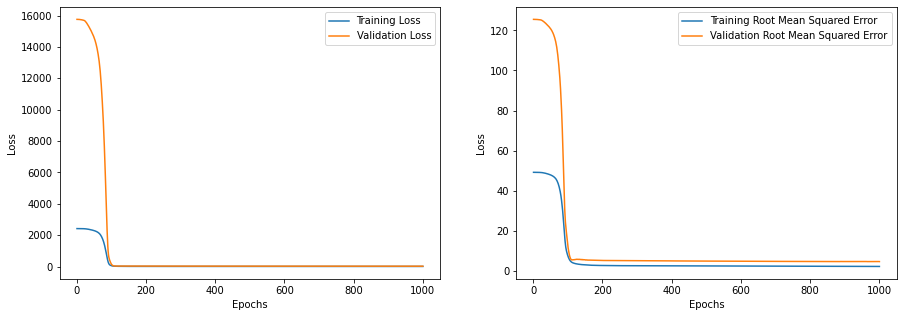

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of Apple

In [22]:
AAPL_prediction = AAPL_Model.predict(AAPL_Test_X) # predicting using the created model

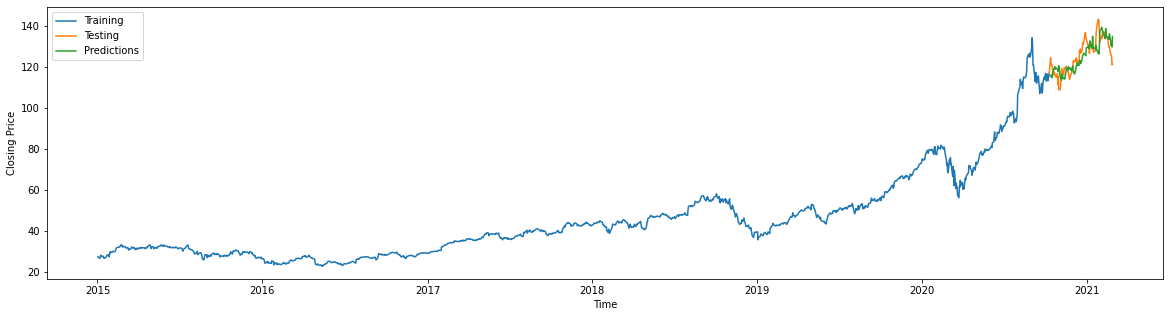

In [23]:
plt.figure(figsize=(20, 5))
plt.plot(AAPL['Date'][AAPL['Date'] < '2020-10-12'], AAPL['Close'][AAPL['Date'] < '2020-10-12'], label = 'Training')
plt.plot(AAPL['Date'][AAPL['Date'] >= '2020-10-09'], AAPL['Close'][AAPL['Date'] >= '2020-10-09'], label = 'Testing')
plt.plot(AAPL['Date'][AAPL['Date'] >= '2020-10-12'], AAPL_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')
#Plotting the prediction 

### Printing the RMSE

In [24]:
rmse = math.sqrt(mean_squared_error(AAPL_Test_Y.reshape(-1, 5), AAPL_prediction))
mape = np.mean(np.abs(AAPL_prediction - AAPL_Test_Y.reshape(-1, 5))/np.abs(AAPL_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 4.605067764810013
MAPE: 0.02772089230376777


In [33]:
AAPL_Model.save('model')

INFO:tensorflow:Assets written to: model\assets


In [ ]:
[[116.79],
        [113.02],
        [116.5 ],
        [113.16],
        [115.08]]

In [26]:
newPred = AAPL_Model.predict([[[116.79],[113.02],[116.5 ],[113.16],[115.08]]])

In [27]:
newPred

array([[115.825714, 115.321915, 115.80638 , 114.6698  , 116.761635]],
      dtype=float32)

In [30]:
Open = [120.79]
High = [140.02]
Low=[112.5 ]
Close=[120.16]
AdjClose = [114.08]
newPred2 = AAPL_Model.predict([[Open,High,Low,Close,AdjClose]])

In [31]:
newPred2

array([[122.85797, 120.2246 , 120.39873, 119.17808, 125.08651]],
      dtype=float32)

In [34]:
model = tf.keras.models.load_model('model', custom_objects={'leaky_relu': tf.nn.leaky_relu})

In [35]:
newPred3 = model.predict([[Open,High,Low,Close,AdjClose]])

In [36]:
newPred3

array([[122.85797, 120.2246 , 120.39873, 119.17808, 125.08651]],
      dtype=float32)